<a href="https://colab.research.google.com/github/DiegoSmeldry/Lab-IV/blob/main/Ejecutable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📊 Creación de la gráfica

Para la construcción de la recta de calibración se siguieron los siguientes pasos:

1. Medición de datos utilizando voltímetro, amperímetro y gaussímetro.

2. Generación del código QR asociado al experimento.

3. Representación gráfica de los resultados obtenidos.

4. Desarrollo del modelo predictor mediante regresión.

5. Predicción de nuevos valores ingresados por el usuario a través de un input.

### 1. Medición de datos utilizando voltímetro, amperímetro y gaussímetro.

En nuestro caso las medidas ya fueron tomadas, las convetimos en un array de python para poder operarlas.

In [7]:
import numpy as np

# Medido en Voltio (+- 0.10)
voltaje = np.array([0, 0.3, 0.4, 0.7, 0.8, 1.0, 1.2, 1.5, 1.8, 1.9, 2.0, 2.2, 2.25, 2.70 , 2.90,
                    3.2, 3.5, 3.7, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0])

# Medido en Amperes (+- 0.10)
corriente = np.array([0, 0.13, 0.15, 0.26, 0.32, 0.39, 0.47, 0.57, 0.68, 0.73, 0.78, 0.86, 0.95,
                      1.03, 1.13, 1.24, 1.35, 1.43, 1.53, 1.72, 1.95, 2.10, 2.35, 2.5, 2.7, 2.85, 3.08])

# Medido en Gauss (+- 0.1)
campoMagnetico = np.array([0.8, 13.0 ,14.2, 24.7, 30.2, 37.3, 44.2, 53.0, 63.3, 68.3, 73.0, 80.5,
                           88.1, 94.0, 105.0, 115.0, 125.0, 132.5, 141.5, 159.4, 180.0, 194.2,
                           217.0, 231.4, 249.7, 262.5, 284.0])


### 2. Generación del código QR asociado al experimento.
Para la generación del código QR se aprovecha que esta es una tecnología abierta y de libre uso. Solo requiere proporcionar un enlace como entrada, y puede implementarse fácilmente en Python mediante la librería qrcode.

In [8]:
!pip install qrcode[pil]


In [47]:
import qrcode

# Configuración del QR
qr = qrcode.QRCode(
    version=1,  # controla el tamaño del QR (1 es el más pequeño)
    error_correction=qrcode.constants.ERROR_CORRECT_H,  # nivel alto de corrección de errores asi puede
#leerse el Qr aunque se dañe el papel
    box_size=15,  # tamaño de cada "cuadro"
    border=4,  # grosor del borde
)

# Agregamos el link del repositorio y creamos el Qr
qr.add_data("https://github.com/DiegoSmeldry/Lab-IV")
qr.make(fit=True)

# Personalizar colores
img = qr.make_image(fill_color="gray", back_color="white")

# Guardar
img.save("qr_Para_la_grafica.png")


### 3. Representación gráfica de los resultados obtenidos.

Con la librería Matplotlib es posible graficar los datos experimentales de manera precisa y visualmente clara. Además, se puede incorporar el código QR previamente generado dentro de la gráfica, lo que facilita la vinculación directa con información adicional del experimento.

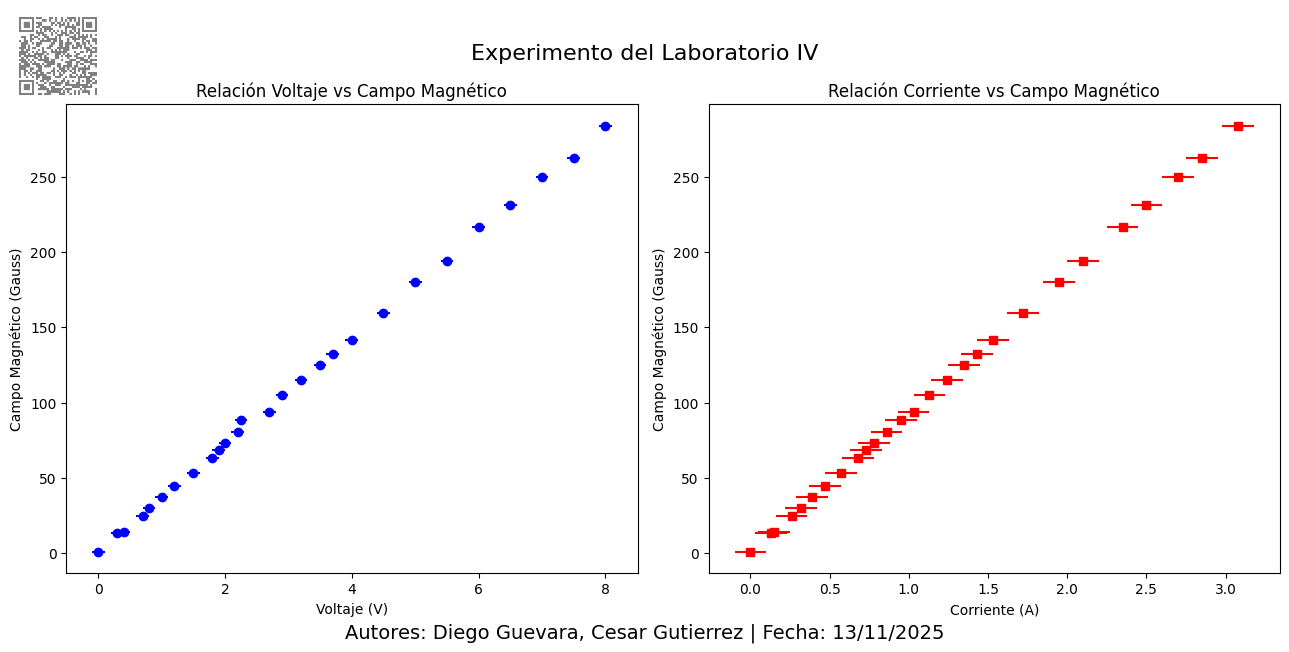

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Creamos la figura con dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))

# Primer gráfico: Voltaje vs Campo Magnético
ax1.errorbar(voltaje, campoMagnetico, xerr=0.10, yerr=0.10, marker="s", color="blue", label="Voltaje-Campo", linestyle='none')
ax1.set_title("Relación Voltaje vs Campo Magnético")
ax1.set_xlabel("Voltaje (V)")
ax1.set_ylabel("Campo Magnético (Gauss)")


# Segundo gráfico: Corriente vs Campo Magnético
ax2.errorbar(corriente, campoMagnetico, xerr=0.10, yerr=0.10, marker="s", color="red", label="Corriente-Campo", linestyle='none')
ax2.set_title("Relación Corriente vs Campo Magnético")
ax2.set_xlabel("Corriente (A)")
ax2.set_ylabel("Campo Magnético (Gauss)")

# Título general de la figura
fig.suptitle("Experimento del Laboratorio IV", fontsize=16)

# Nombre del experimentador y fecha
experimentador = "Autores: Diego Guevara, Cesar Gutierrez"
fecha = f"Fecha: 13/11/2025"
fig.text(0.5, -0.01, f"{experimentador} | {fecha}", ha="center", fontsize=14)

plt.tight_layout()

# Cargar imagen
img = mpimg.imread("qr_Para_la_grafica.png")

# Convertir la imagen en objeto OffsetImage
imagebox = OffsetImage(img, zoom=0.1)

# Colocar la imagen en la esquina superior derecha
ab = AnnotationBbox(imagebox, (max(corriente), max(campoMagnetico)),
                    frameon=False,   # sin borde
                    xybox=(-170, 50),  # desplazamiento en pixeles
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0)

ax1.add_artist(ab)
plt.show()


#### 3.1 Curva de calibración (Corriente vs campo Magnético)

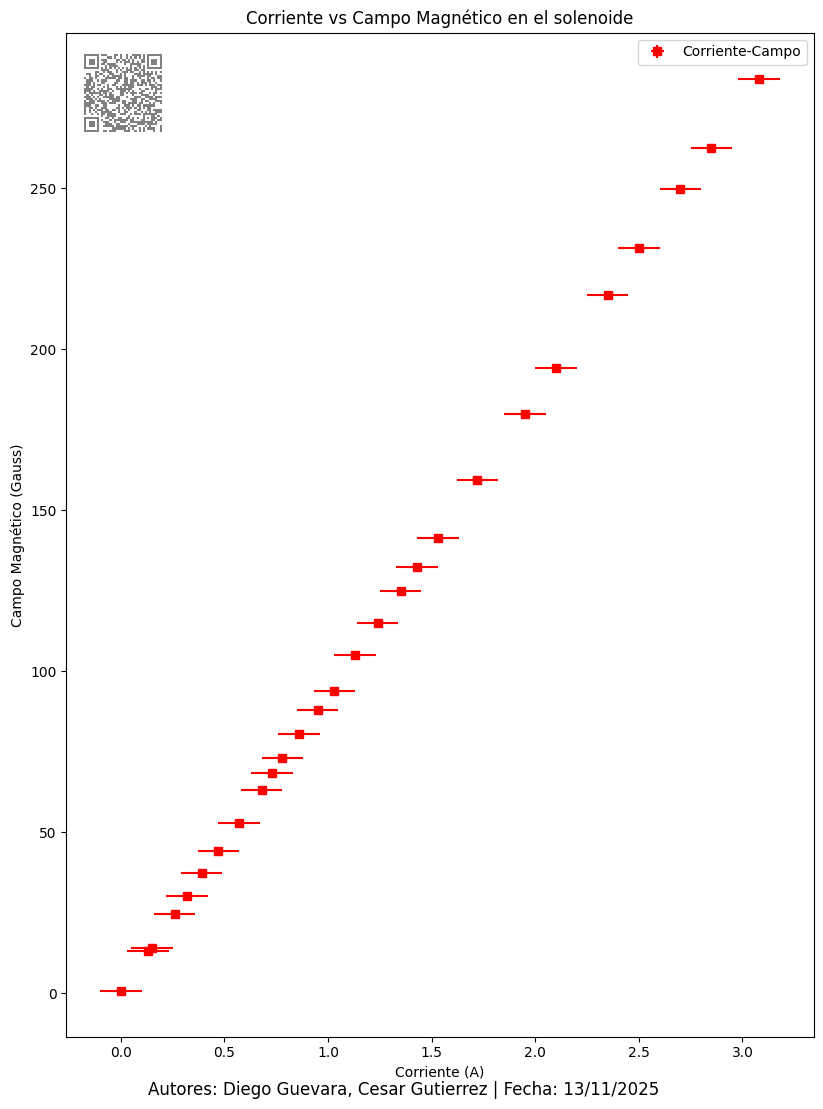

In [103]:
# Crear figura con tamaño de hoja carta
plt.figure(figsize=(8.5, 11))

# Corriente vs Campo Magnético con barras de error
plt.errorbar(corriente, campoMagnetico,
             xerr=0.10, yerr=0.10,
             marker="s", color="red",
             label="Corriente-Campo", linestyle='none')

plt.title("Corriente vs Campo Magnético en el solenoide")
plt.xlabel("Corriente (A)")
plt.ylabel("Campo Magnético (Gauss)")
plt.legend()

# Autores y fecha
experimentador = "Autores: Diego Guevara, Cesar Gutierrez"
fecha = "Fecha: 13/11/2025"
plt.figtext(0.5, 0.0, f"{experimentador} | {fecha}", ha="center", fontsize=12)

# Cargar imagen QR
img = mpimg.imread("qr_Para_la_grafica.png")
imagebox = OffsetImage(img, zoom=0.1, interpolation='none')

# Insertar imagen en esquina superior derecha
ab = AnnotationBbox(imagebox, (max(corriente), max(campoMagnetico)),
                    frameon=False, xybox=(-458, -10),
                    xycoords='data', boxcoords="offset points", pad=0)

plt.gca().add_artist(ab)  # se añade al eje actual

plt.tight_layout()
plt.show()


### 4. Desarrollo del modelo predictor mediante regresión.

In [85]:
from sklearn.linear_model import LinearRegression

X = corriente.reshape(-1, 1)
modelo = LinearRegression()
modelo.fit(X, campoMagnetico)

# Coeficiente y término independiente
print(f"Pendiente: {modelo.coef_[0]: .5f}")
print(f"Intercepto: {modelo.intercept_: .5f} ")
print(f"Valor de R²: {modelo.score(X, campoMagnetico): .5f}")

Pendiente:  92.00535
Intercepto:  0.83786 
Valor de R²:  0.99997


### 5. Predicción de nuevos valores ingresados por el usuario a través de un input.

In [86]:
valor_corriente = float(input("Ingrese el valor de corriente medido en Ampere: "))
prediccion = modelo.predict([[valor_corriente]])
print(f"Predicción de campo magnético: {prediccion[0]: .2f} Gauss")

Ingrese el valor de corriente medido en Ampere: 5
Predicción de campo magnético:  460.86 Gauss
